In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [30]:
import pandas as pd
train = pd.read_csv("C:/Users/keert/Desktop/Semester 2/ML/final/BP-Fakebook/Train_FB.csv")

In [31]:
train.isnull().sum()

date       0
title      0
text     534
type       0
dtype: int64

In [32]:
print(train.shape)

(38000, 4)


In [33]:
train.head()

,date,title,text,type
0,2016-03-11,Governor extends Flint water emergency as stat...,WASHINGTON (Reuters) - Michigan Governor Rick ...,real
1,2017-10-09,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",Democrats are calling for President Trump s sc...,fake
2,2018-02-01,Mexico recognizes Honduran president as winner...,MEXICO CITY (Reuters) - Mexico recognized Hond...,real
3,2016-11-20,BOOM! Wikileaks Shows Hillary Speech To Banker...,No wonder she didn t want anyone to see her sp...,fake
4,2017-07-06,Paul Ryan says confident tax reform will pass ...,WASHINGTON (Reuters) - Republicans will be abl...,real


In [34]:
fake = train['type']=='fake'
real = train['type']=='real'

dist = pd.Series([len(fake)],index=['fake' ])

dist['real'] = len(real)


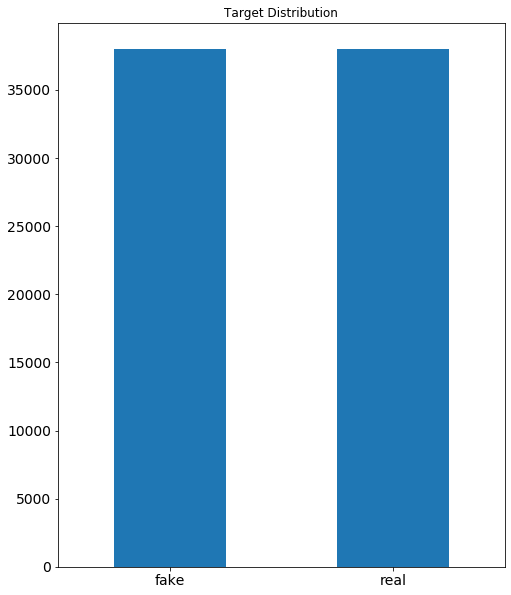

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))

dist.plot.bar()
plt.xticks(rotation=0,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.title('Target Distribution')
plt.show()

In [35]:
train['type'] = train['type'].map({'fake': 1, 'real': 0})
train['Year']=[d.split('-')[0] for d in train.date]
train['Month']=[d.split('-')[1] for d in train.date]
train['Day']=[d.split('-')[2] for d in train.date]
train = train.drop(columns = ['date','title'])
train.head(5)

,text,type,Year,Month,Day
0,WASHINGTON (Reuters) - Michigan Governor Rick ...,0,2016,03,11
1,Democrats are calling for President Trump s sc...,1,2017,10,09
2,MEXICO CITY (Reuters) - Mexico recognized Hond...,0,2018,02,01
3,No wonder she didn t want anyone to see her sp...,1,2016,11,20
4,WASHINGTON (Reuters) - Republicans will be abl...,0,2017,07,06


In [36]:
train['text']= train['text'].apply(str)

train['text']= train['text'].map(lambda x: x.lower())

In [37]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [38]:


def preprocess(text):
   # split into words
    text = word_tokenize(text)
    # convert to lower case
    text= [w.lower() for w in text]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    text = [w.translate(table) for w in text]
    # remove remaining tokens that are not alphabetic
    text = [word for word in text if word.isalpha()]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = " ".join(text)
    return(text)

In [39]:
train['text'] = pd.DataFrame(train['text'].map(preprocess))

In [40]:
train.head()

,text,type,Year,Month,Day
0,washington reuters michigan governor rick snyd...,0,2016,03,11
1,democrats calling president trump scalp pardon...,1,2017,10,09
2,mexico city reuters mexico recognized honduran...,0,2018,02,01
3,wonder want anyone see speeches singing praise...,1,2016,11,20
4,washington reuters republicans able push tax r...,0,2017,07,06


In [33]:
train.type.value_counts()

1    19332
0    18134
Name: type, dtype: int64

In [8]:
#For train
# tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
# tfidf_vectorizer.fit_transform(train['text'].values)
# X_train=tfidf_vectorizer.transform(train['text'].values)

# #For test
# tfidf_vectorizer.fit_transform(test['text'].values)
# X_test=tfidf_vectorizer.transform(test['text'].values)

In [ ]:
#For test
# tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
# tfidf_vectorizer.fit_transform(X_train['text'].values)
# train=tfidf_vectorizer.transform(X_train['text'].values)

In [41]:
def extract_features(traindata,field,training_data,testing_data,type="binary"):
    tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
    tfidf_vectorizer.fit_transform(training_data[field].values)
    train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
    test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
    return train_feature_set,test_feature_set,tfidf_vectorizer          

In [42]:
# # GET A TRAIN TEST SPLIT (set seed for consistent results)
# training_data = train
# testing_data = test

# # GET LABELS
# Y_train=train['type'].values
# traindata = train.drop(columns=['type'])

# # GET FEATURES
# X_train,X_test,feature_transformer=extract_features(traindata,'text',training_data,testing_data)

In [43]:
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data, testing_data = train_test_split(train,random_state = 2000)

# GET LABELS
Y_train=training_data['type'].values
Y_test=testing_data['type'].values
traindata = train.drop(columns=['type'])

# GET FEATURES
X_train,X_test,feature_transformer=extract_features(traindata,'text',training_data,testing_data)

In [77]:
training_data.head()

,text,type,Year,Month,Day
8074,washington reuters outgoing president barack o...,0,2017,02,25
11514,nan,1,2016,12,28
21686,republican senator found tough position trappe...,1,2017,05,06
34585,media done taking donald trump constant abusea...,1,2017,03,28
13757,since article written illegal immigration cris...,1,2016,04,02


In [78]:
# 28099x101331 == X_train
# 9367x101331 == X_test
X_train

<28500x151319 sparse matrix of type '<class 'numpy.float64'>'
	with 4592133 stored elements in Compressed Sparse Row format>

In [29]:
print(training_data.shape)
print(testing_data.shape)

(37466, 5)
(2961, 4)


In [49]:
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)

(28099,)
(9367,)
(28099, 101331)
(9367, 101331)


In [31]:
X_train

<37466x114177 sparse matrix of type '<class 'numpy.float64'>'
	with 7859434 stored elements in Compressed Sparse Row format>

In [32]:
X_test

<2961x114177 sparse matrix of type '<class 'numpy.float64'>'
	with 614351 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [79]:
logreg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
logreg.fit(X_train,Y_train)

[LibLinear]

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [80]:
y_pred=logreg.predict(X_test)

In [81]:
#CM

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[4533,   36],
       [  41, 4890]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))


Accuracy: 0.9918947368421053
Precision: 0.9926918392204629
Recall: 0.9916852565402555


In [83]:
import matplotlib.pyplot as plt

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<Figure size 640x480 with 1 Axes>

# Random forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

y_pred = rf.predict(X_test)

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
#CM

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[4466,  103],
       [ 255, 4676]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9623157894736842
Precision: 0.9784473739276
Recall: 0.9482863516528087


# Voting Classifier

In [97]:
from sklearn.ensemble import VotingClassifier
vreg = VotingClassifier([('logisticReg', logreg), ('RandomForest', rf),('SVM', svc)])
vreg.fit(X_train,Y_train)

y_pred = vreg.predict(X_test)

[LibLinear]

In [98]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[4543,   26],
       [  29, 4902]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9942105263157894
Precision: 0.994724025974026
Recall: 0.9941188399918881


# SVM

In [96]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)


In [88]:
#CM

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[4548,   21],
       [  29, 4902]], dtype=int64)

In [89]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.9947368421052631
Precision: 0.9957343083485679
Recall: 0.9941188399918881


# TEST FILE CODE

In [45]:
train = pd.read_csv("C:/Users/keert/Desktop/Semester 2/ML/final/BP-Fakebook/Train_FB.csv")
test = pd.read_csv("C:/Users/keert/Desktop/Semester 2/ML/final/BP-Fakebook/Test_FB.csv")

In [46]:
train['type'] = train['type'].map({'fake': 1, 'real': 0})
train['Year']=[d.split('-')[0] for d in train.date]
train['Month']=[d.split('-')[1] for d in train.date]
train['Day']=[d.split('-')[2] for d in train.date]
train = train.drop(columns = ['date','title'])
train.head(5)

,text,type,Year,Month,Day
0,WASHINGTON (Reuters) - Michigan Governor Rick ...,0,2016,03,11
1,Democrats are calling for President Trump s sc...,1,2017,10,09
2,MEXICO CITY (Reuters) - Mexico recognized Hond...,0,2018,02,01
3,No wonder she didn t want anyone to see her sp...,1,2016,11,20
4,WASHINGTON (Reuters) - Republicans will be abl...,0,2017,07,06


In [47]:
test['Year']=[d.split('-')[0] for d in test.date]
test['Month']=[d.split('-')[1] for d in test.date]
test['Day']=[d.split('-')[2] for d in test.date]
test = test.drop(columns = ['date','title'])
test.head(5)

,text,Year,Month,Day
0,TOKYO (Reuters) - The Kremlin said on Friday t...,2017,01,28
1,Why couldn t the parents be notified of his de...,2015,06,07
2,Amateur president Donald Trump left his chair ...,2017,09,01
3,NEW YORK (Reuters) - The Federal Bureau of Inv...,2016,08,14
4,(Reuters) - U.S. Democratic presidential candi...,2016,12,08


In [48]:
train['text']= train['text'].apply(str)
train['text']= train['text'].map(lambda x: x.lower())

test['text']= test['text'].apply(str)
test['text']= test['text'].map(lambda x: x.lower())

In [49]:
train['text'] = pd.DataFrame(train['text'].map(preprocess))

test['text'] = pd.DataFrame(test['text'].map(preprocess))

In [50]:
def extract_features(traindata,field,training_data,testing_data,type="binary"):
    tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
    tfidf_vectorizer.fit_transform(training_data[field].values)
    train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
    test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
    return train_feature_set,test_feature_set,tfidf_vectorizer          

In [51]:
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data = train
testing_data = test

# GET LABELS
Y_train=train['type'].values
traindata = train.drop(columns=['type'])

# GET FEATURES
X_train,X_test,feature_transformer=extract_features(traindata,'text',training_data,testing_data)

# LOGISTIC REGRESSION

In [52]:
logreg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
logreg.fit(X_train,Y_train)

[LibLinear]

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

# RANDOM FOREST

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)


C:\Users\keert\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# SVM

In [54]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# VOTING CLASSIFIER

In [55]:
from sklearn.ensemble import VotingClassifier
vreg = VotingClassifier([('logisticReg', logreg), ('RandomForest', rf), ('SVM', svc)])
vreg.fit(X_train,Y_train)

y_pred = vreg.predict(X_test)

[LibLinear]

In [56]:
final = pd.DataFrame(data=y_pred, columns=['type'])
final['type'] = final['type'].map({1: 'fake', 0: 'real'})
final.head()

,type
0,real
1,fake
2,fake
3,real
4,real


In [ ]:
final.to_csv("F.csv")